* read the dataset
* graph the scatter plot
* Eda
    * info
    * description
    * missing values
* Feature engineering- divide the dataset into dependent feature and independent feature  
* Divede the dataset into train and test dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'wieght')

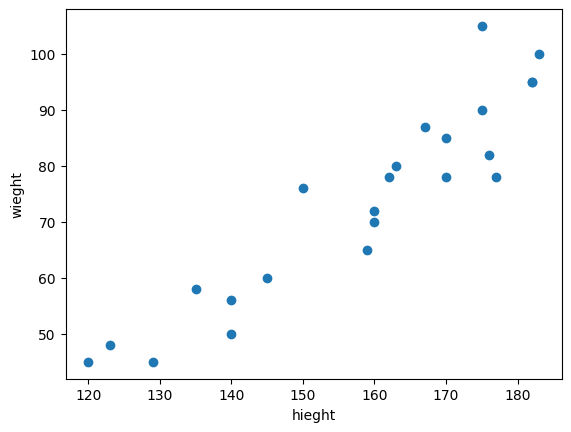

In [3]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel("hieght")
plt.ylabel("wieght")


In [4]:
# EDA 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [5]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [6]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [7]:
# Feature Engineering

x = df[['Height']] #independent variable
y = df['Weight'] # dependent varible


In [10]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
x_train.shape,x_test.shape

((18, 1), (5, 1))

#  Stander Scaling

In [12]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
x_train = scaler.fit_transform(x_train)

In [14]:
x_test= scaler.transform(x_test)

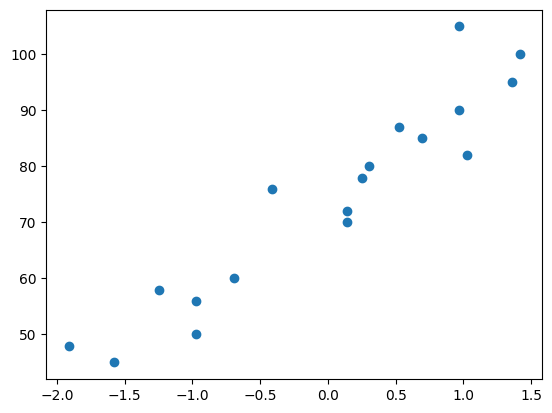

In [15]:
plt.scatter(x_train,y_train)

# Model Traning

In [17]:
# from sklearn.linear_model import LinearRegression
# regrassor = LinearRegression()
from sklearn.linear_model import LinearRegression
regrassor = LinearRegression()

In [18]:
## training the train data

regrassor.fit(x_train,y_train)

LinearRegression()

In [19]:
regrassor.intercept_

74.27777777777777

In [20]:
regrassor.coef_

array([16.71556824])

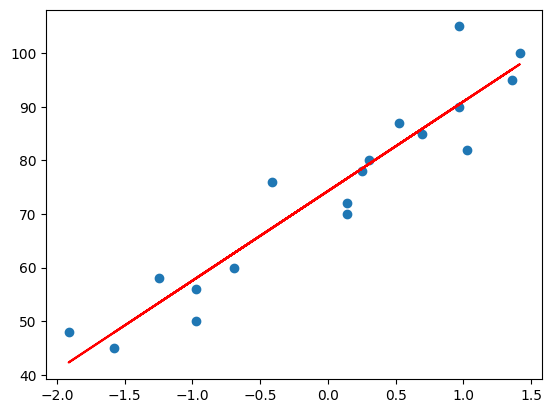

In [27]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regrassor.predict(x_train),color = 'r')

# **Prediction of Train data**
    1. predicted hieght output  = intercept + coef_(wieght)
    2. y_pred_data = 74.27 + 16.71(x_train)
# **Prediction of test data**
    1. predict hieght output= intercept + coef_(wieghts)
    2. y_pred_test = 74.27 + 16.71(X_train)

In [22]:
## pediction for test data 
y_pred_test = regrassor.predict(x_test)
y_pred_test

array([92.36074777, 85.86942521, 39.50283548, 96.99740674, 75.66877547])

In [24]:
y_test

15    78
9     78
0     45
8     95
17    65
Name: Weight, dtype: int64

# **Performance matrics  MSE MAE RMSE**

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

83.23803021031193
8.0787039411815
9.123487831433323


## acuracy of the model R squered and adjusted r squered
## R2 squere

**R^2 - 1 -SSR/SST**

- R^2 = Accuracy of the model
- SSR = Sum of Squere residial 
- SST = Sum of squere Total

In [26]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred_test)
score

0.6981504561563971

## Adjusted R Squered
**formula : R2 - 1 [(1-R2)*(n-1)/(n-k-1)]**

Where:

- R2: the R2 of the model
- n: the number of objservation 
- k: The number of Predictor variable

In [29]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.5975339415418628